# Exercise 0: Have a go as regression with some toy data
Have a go at SciKit-Learn's example. Try to interpret the values.

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


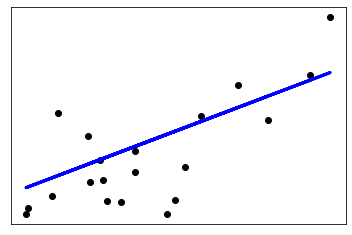

In [1]:
# Code source: Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

# Exercise 1: Linear regression to analyse relationships between house prices and other variables.
We will use regression to explore a house prices dataset. Note that we're not doing prediction (for the sake of it), we're using it to help us analyse data.

Simple Linear Regression
We will use regression to help determine if there is a relationship between floor area and price and how much of the variation in price is due to floor area.

In [2]:
# Step 1: Get the data. 
#Download train.csv training houseprice data (which came from Kaggle) and load into a Pandas data frame.
import pandas as pd
train = pd.read_csv("downloads/train.csv")
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
# Step 2 : Find your variables. Look at the data and check the documentation to identify a column that indicates 
# price and one that indicates area. GrLivArea and SalePrice are good ones to use.
GrLivArea = train["GrLivArea"]
GrLivArea

0       1710
1       1262
2       1786
3       1717
4       2198
        ... 
1455    1647
1456    2073
1457    2340
1458    1078
1459    1256
Name: GrLivArea, Length: 1460, dtype: int64

In [4]:
# Step 2 : Find your variables. Look at the data and check the documentation to identify a column that indicates 
# price and one that indicates area. GrLivArea and SalePrice are good ones to use.
SalePrice = train["SalePrice"]
SalePrice

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

Text(0.5, 1.0, 'Relationship between GrLivArea and SalePrice')

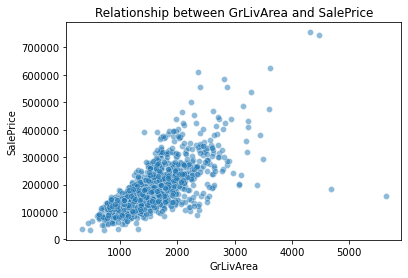

In [5]:
# Step 3 : Check out your variables. Create a scatterplot to see if there's appears to be a relationship between 
# these two variables. Tips: Use transparency and zoom in on the details by removing the outliers from 
# the scatterplot using a Pandas filter, setting the scale of the axes or using an interactive plot. 
# Does there appear to be a relationship? Also, plot the distributions (histgrams and/or box plots).

import seaborn as sns 
a=sns.scatterplot(x="GrLivArea",y="SalePrice",data=train,alpha=0.5)
a.set_title("Relationship between GrLivArea and SalePrice")

(array([107., 554., 535., 189.,  57.,  12.,   2.,   2.,   1.,   1.]),
 array([ 334. ,  864.8, 1395.6, 1926.4, 2457.2, 2988. , 3518.8, 4049.6,
        4580.4, 5111.2, 5642. ]),
 <BarContainer object of 10 artists>)

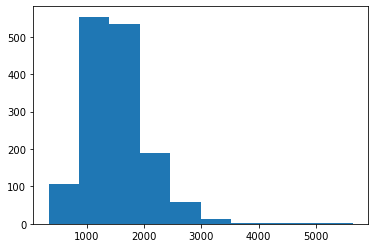

In [6]:
# Step 3: Also, plot the distributions (histgrams and/or box plots).
import matplotlib.pyplot as plt
plt.hist(GrLivArea)


(array([148., 723., 373., 135.,  51.,  19.,   4.,   3.,   2.,   2.]),
 array([ 34900., 106910., 178920., 250930., 322940., 394950., 466960.,
        538970., 610980., 682990., 755000.]),
 <BarContainer object of 10 artists>)

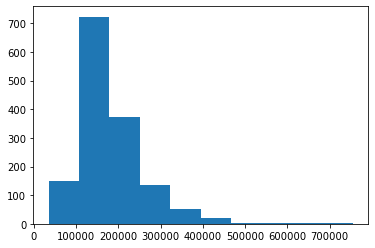

In [7]:
# Step 3: Also, plot the distributions (histgrams and/or box plots).
import matplotlib.pyplot as plt
plt.hist(SalePrice)



Coefficients: 
 [[107.13035897]]
Mean squared error: 448705337470805.12
Coefficient of determination: -1626094507.84


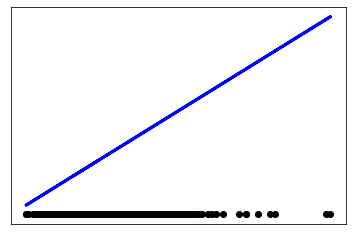

In [8]:
# Step 4:Build a simple linear regression model. Assuming you think there's a relationship (there is!), build 
# a regression model that predicts price from floor area in order to see how the variation in price can be 
# explained by floor area. Use the SciKit-Learn's example. Determine your independent variable (x) and dependent 
# variable (y), create a new linear model object and use its fit() function to fit the model and extract the two 
# parameters (intersept and slope). Interpret these - what do they tell you about the relationship between floor 
# area and price? Tip, fit() needs a list of 1 independent variable - you can use double square brackets like this:
# dataframe[['VARNAME']]

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression object
regr = linear_model.LinearRegression()


# Train the model using the training sets
regr.fit(train[["GrLivArea"]], train[["SalePrice"]])

# Make predictions using the testing set
y_pred = regr.predict(train[["SalePrice"]])


# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(train[["GrLivArea"]], y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(train[["GrLivArea"]], y_pred))

# Plot outputs
plt.scatter(train[["SalePrice"]], train[["GrLivArea"]], color="black")
plt.plot(train[["SalePrice"]], y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()


In [12]:
#Step 5: Quantify the variation in price due to floor area. Use the score() function to get the R2 value.
#How much of the variation is explained by floor area?
a=regr.score(train[["GrLivArea"]],train[["SalePrice"]])
a

0.5021486502718042

Coefficients: 
 [[2.09997195]]
Mean squared error: 306080432328.49
Coefficient of determination: -3073.41


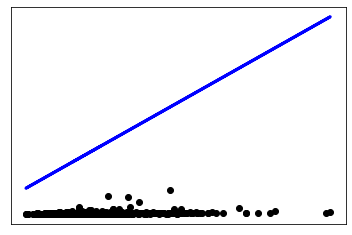

In [15]:
# Step 6: Predict price from floor area using this model and compare with observed. 
#Add a new column of predicted prices using LinearRegression's predict() function. 
#Plot a scatterplot with the floorspace vs price and floorspace vs predicted price on the same axis with 
#different coloured dots. How's the model look?

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression object
regr = linear_model.LinearRegression()


# Train the model using the training sets
regr.fit(train[["LotArea"]], train[["SalePrice"]])

# Make predictions using the testing set
y_pred = regr.predict(train[["SalePrice"]])


# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(train[["LotArea"]], y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(train[["LotArea"]], y_pred))

# Plot outputs
plt.scatter(train[["SalePrice"]], train[["LotArea"]], color="black")
plt.plot(train[["SalePrice"]], y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()






In [40]:
# Step 7:Calculate residuals. Add a new column of residuals (observed minus predicted values). 
# Look at the means and distributions and comment on the effect size - does it predict within a reasonable margin?
train["residuals"] = y_pred - SalePrice

ValueError: Length of passed values is 1994, index implies 1460.

In [41]:
import numpy as np 
numeric_features = train.select_dtypes(include=[np.number])
corr = numeric_features.corr()
print (corr['SalePrice'].sort_values(ascending=False)[:10], '\n') #top 10

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64 



In [44]:
numeric_features = train.select_dtypes(include=[np.number])
corr = numeric_features.corr()
print (corr['GrLivArea'].sort_values(ascending=False)[:10], '\n') #top 10

GrLivArea       1.000000
TotRmsAbvGrd    0.825489
SalePrice       0.708624
2ndFlrSF        0.687501
FullBath        0.630012
OverallQual     0.593007
1stFlrSF        0.566024
BedroomAbvGr    0.521270
GarageArea      0.468997
GarageCars      0.467247
Name: GrLivArea, dtype: float64 



In [45]:
#  picked GarageArea

In [47]:
#Create a new model with two independent variables Create a new model
#with two independent variables with one you used before and the one 
#you just selected.

import statsmodels.api as sm
import numpy as np
dependent=  train["SalePrice"]
independents = train["GrLivArea"] + train["GarageArea"]
model = sm.OLS(dependent,independents)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.935
Model:                            OLS   Adj. R-squared (uncentered):              0.935
Method:                 Least Squares   F-statistic:                          2.100e+04
Date:                Thu, 11 Nov 2021   Prob (F-statistic):                        0.00
Time:                        18:50:06   Log-Likelihood:                         -17879.
No. Observations:                1460   AIC:                                  3.576e+04
Df Residuals:                    1459   BIC:                                  3.577e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            91.2827      0.630    144.924      0.000      90.047      92.518
==============================================================================
Omnibus:                      296.847   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7832.624
Skew:                           0.221   Prob(JB):                         0.00
Kurtosis:                      14.338   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Exercise 2: Linear regression to analyse relationships between crimes and socioeconomic characteristics

We will using from the UCI Machine Learning Repository, a good resource to find example data sets. The data - Communities in the US. combines socio-economic data from the 1990 Census, law enforcement data from the 1990 Law Enforcement Management and Admin Stats survey, and crime data from the 1995 FBI UCR.

We have two versions of the data, a problematic one with some missing values, and a clean version where the problematic columns have been removed. Detailed information on column names can be found here.

The original the data was to help determine relationships between crime statistics and socio-economic variables.

There are some alternative regression libraries you can try if you like in this exercise.

In [22]:
#Step 1:Load Data. Load the Communities in the US (cleaned version) into a Pandas dataframe.

import pandas as pd 
df = pd.read_csv("downloads/censusCrimeClean.csv")
df

,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
0,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,...,0.00,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.20
1,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,...,0.00,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.67
2,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,...,0.00,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.43
3,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,...,0.00,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.12
4,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,...,0.00,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,...,0.00,0.22,0.28,0.34,0.48,0.39,0.01,0.28,0.05,0.09
1990,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,...,0.00,0.53,0.25,0.17,0.10,0.00,0.02,0.37,0.20,0.45
1991,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,...,0.02,0.25,0.68,0.61,0.79,0.76,0.08,0.32,0.18,0.23
1992,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,...,0.01,0.45,0.64,0.54,0.59,0.52,0.03,0.38,0.33,0.19


In [23]:
#Step 2: Choose two columns and save as variables. You can choose any but an interesting pair could be "medIncome" and "ViolentCrimesPerPop".
medIncome = df["medIncome"]
medIncome

0       0.37
1       0.31
2       0.30
3       0.58
4       0.50
        ... 
1989    0.42
1990    0.28
1991    0.31
1992    0.44
1993    0.40
Name: medIncome, Length: 1994, dtype: float64

In [24]:
#Step 2: Choose two columns and save as variables. You can choose any but an interesting pair could be "medIncome" and "ViolentCrimesPerPop".
ViolentCrimesPerPop = df["ViolentCrimesPerPop"]
ViolentCrimesPerPop

0       0.20
1       0.67
2       0.43
3       0.12
4       0.03
        ... 
1989    0.09
1990    0.45
1991    0.23
1992    0.19
1993    0.48
Name: ViolentCrimesPerPop, Length: 1994, dtype: float64

Coefficients: 
 [[-0.38120877]]
Mean squared error: 0.05
Coefficient of determination: 0.07


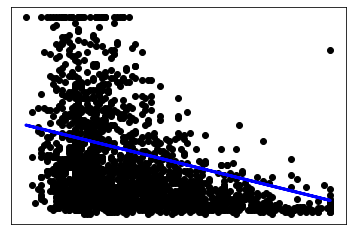

In [25]:
# Step 4: Fit a model and inspect the parameters. Fit a simple linear 
#regression model using either scikit (see above) or 
#scipy.stats.linregress() function to perform a linear regression. 
#Show the model parameters produced.

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression object
regr = linear_model.LinearRegression()


# Train the model using the training sets
regr.fit(df[["ViolentCrimesPerPop"]], df[["medIncome"]])

# Make predictions using the testing set
y_pred = regr.predict(df[["medIncome"]])


# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(df[["ViolentCrimesPerPop"]], y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(df[["ViolentCrimesPerPop"]], y_pred))

# Plot outputs
plt.scatter(df[["medIncome"]], df[["ViolentCrimesPerPop"]], color="black")
plt.plot(df[["medIncome"]], y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()







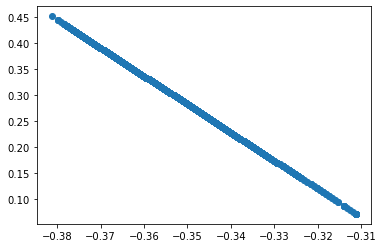

In [32]:
#Step6:Calculate a regression line. Use Numpy's polyval() function
#to calculate a regression line. The code below will calculate 
#dependent variable values for each independent variable value.

modelledDependent = np.polyval([0.07, -0.38120877], df[["medIncome"]])
import seaborn as sns
modelledDependent
plt.scatter(modelledDependent,y_pred)

In [33]:
#Step 7: Comment on the model. You might also try to fit a seond-order
#polynomial function that might describe the shape better.

pCoeff = np.polyfit(df["ViolentCrimesPerPop"], df["medIncome"], 2)
evaluatedCurve = np.polyval(pCoeff, df["ViolentCrimesPerPop"])

In [39]:
import statsmodels.api as sm
import numpy as np
dependent=  df["medIncome"]
independents = df["ViolentCrimesPerPop"]  + df["PctForeignBorn"]+df["PctBornSameState"]
model = sm.OLS(dependent,independents)
results = model.fit()

In [38]:
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              medIncome   R-squared (uncentered):                   0.220
Model:                            OLS   Adj. R-squared (uncentered):              0.220
Method:                 Least Squares   F-statistic:                              563.5
Date:                Thu, 11 Nov 2021   Prob (F-statistic):                   6.50e-110
Time:                        18:37:21   Log-Likelihood:                         -838.91
No. Observations:                1994   AIC:                                      1680.
Df Residuals:                    1993   BIC:                                      1685.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
ViolentCrimesPerPop     0.5885      0.025     23.739      0.000       0.540       0.637
==============================================================================
Omnibus:                       14.454   Durbin-Watson:                   1.270
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.674
Skew:                           0.204   Prob(JB):                     0.000651
Kurtosis:                       2.897   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""